In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("data_set.csv")   # load the dataset

print("✅ Data Loaded Successfully!\n")
print(df.head(), "\n")

✅ Data Loaded Successfully!

   Rooms  Area  Location  Age   Price
0      3  1200  Downtown   10  220000
1      4  1500    Suburb    5  250000
2      2   800     Rural   20  130000
3      5  2000  Downtown    2  400000
4      3  1100    Suburb   15  180000 



In [3]:
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [4]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print("✅ Linear Regression Model Trained Successfully!\n")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}\n")

✅ Linear Regression Model Trained Successfully!

Mean Squared Error: 325883919.87
R² Score: 0.8206



In [10]:
# Display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients, "\n")

Model Coefficients:
                  Coefficient
Rooms            -6987.339853
Area               205.170192
Age              -1903.570616
Location_Rural  -12775.377151
Location_Suburb -27371.692821 



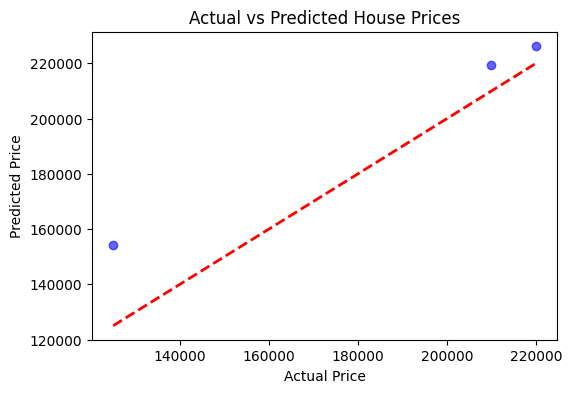

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()